In [1]:
from ultralytics import YOLO

/home/siddharth/anaconda3/envs/yolo12/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


In [5]:
ls

/bin/bash: /home/siddharth/anaconda3/envs/rtgslam/lib/libtinfo.so.6: no version information available (required by /bin/bash)
check.ipynb  yolov12/  yolov12x.pt


In [2]:
model = YOLO('yolov12x.pt')
# model.val(data='coco.yaml', save_json=True)


In [8]:
image_path = '/home/siddharth/siddharth/thesis/Yolo_segmentation/eval_datasets/figurines/images/test_0.jpg'
results = model(image_path)



image 1/1 /home/siddharth/siddharth/thesis/Yolo_segmentation/eval_datasets/figurines/images/test_0.jpg: 480x640 1 cup, 1 apple, 1 cake, 1 chair, 1 dining table, 21.8ms
Speed: 20.2ms preprocess, 21.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


In [9]:
for result in results:
    result.show()

In [5]:
detections =results[0].boxes
class_indices = detections.cls.int().tolist()
bboxes =detections.xyxy.cpu().numpy()
print("YOLO Detected Classes:", bboxes)


YOLO Detected Classes: [[     53.143      342.01      192.77      477.45]
 [     127.52           0      387.69      97.522]
 [     0.2206      14.945         986      718.59]
 [     484.43      301.67      553.89      390.96]
 [      1.159      14.891         986      717.02]]


In [6]:
all_masks = []
for box in bboxes:
    masks, _, _ = predictor.predict(box=box, multimask_output=False)
    all_masks.append(masks)
# return np.array(all_masks)

NameError: name 'predictor' is not defined

In [214]:
all_masks[0].shape

(1, 680, 1200)

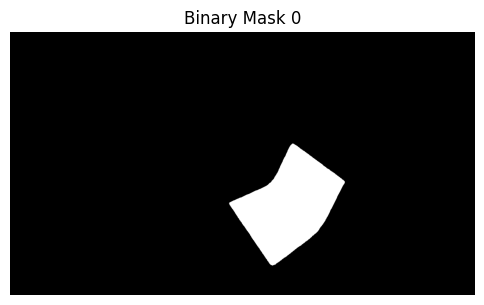

In [216]:
show_binary_mask(all_masks[0][0])

In [2]:
class_names = {
    0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 
    6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 
    11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 
    16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 
    22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 
    27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 
    32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 
    36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 
    40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 
    46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 
    51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 
    57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 
    62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 
    67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 
    72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 
    77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush', 80:'others'
}

In [206]:
# Extract bounding boxes
bboxes=[]
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()  # Convert tensor to list
    class_id = int(box.cls[0])  # Class ID
    class_name = class_names.get(class_id, "Unknown")  # Get class name

    bboxes.append({
        "x1": x1, "y1": y1, "x2": x2, "y2": y2, 
        "class_id": class_id, "class_name": class_name
    })

print(bboxes)

[{'x1': 563.7872924804688, 'y1': 286.06280517578125, 'x2': 866.9421997070312, 'y2': 607.6640014648438, 'class_id': 56, 'class_name': 'chair'}, {'x1': 700.9947509765625, 'y1': 467.1743469238281, 'x2': 1169.1246337890625, 'y2': 672.0709838867188, 'class_id': 56, 'class_name': 'chair'}, {'x1': 0.7856940627098083, 'y1': 276.6150207519531, 'x2': 497.3868713378906, 'y2': 666.8909912109375, 'class_id': 57, 'class_name': 'couch'}, {'x1': 956.6820678710938, 'y1': 0.06689070910215378, 'x2': 1199.358154296875, 'y2': 303.6485900878906, 'class_id': 62, 'class_name': 'tv'}, {'x1': 295.778564453125, 'y1': 433.0354309082031, 'x2': 719.8121337890625, 'y2': 669.8018798828125, 'class_id': 60, 'class_name': 'dining table'}]


In [7]:
import cv2
import matplotlib.pyplot as plt
import random

# # Sample bounding boxes
# bboxes = [
#     {'x1': 563.787, 'y1': 286.062, 'x2': 866.942, 'y2': 607.664, 'class_id': 56, 'class_name': 'chair'},
#     {'x1': 700.994, 'y1': 467.174, 'x2': 1169.124, 'y2': 672.070, 'class_id': 56, 'class_name': 'chair'},
#     {'x1': 0.785, 'y1': 276.615, 'x2': 497.386, 'y2': 666.890, 'class_id': 57, 'class_name': 'couch'},
#     {'x1': 956.682, 'y1': 0.066, 'x2': 1199.358, 'y2': 303.648, 'class_id': 62, 'class_name': 'tv'},
#     {'x1': 295.778, 'y1': 433.035, 'x2': 719.812, 'y2': 669.801, 'class_id': 60, 'class_name': 'dining table'}
# ]

# Load the image
# image_path = "/home/siddharth/siddharth/thesis/RTG-SLAM/data/Replica/office0/results/frame000394.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Generate random colors for each bounding box
colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(bboxes))]

# Draw bounding boxes
for i, bbox in enumerate(bboxes):
    x1, y1, x2, y2 = int(bbox['x1']), int(bbox['y1']), int(bbox['x2']), int(bbox['y2'])
    class_name = bbox['class_name']
    
    color = tuple(colors[i])  # Get a unique color for this box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)  # Draw rectangle
    # cv2.putText(image, x1, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)  # Label

    cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)  # Label

# Show the image with bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.show()



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

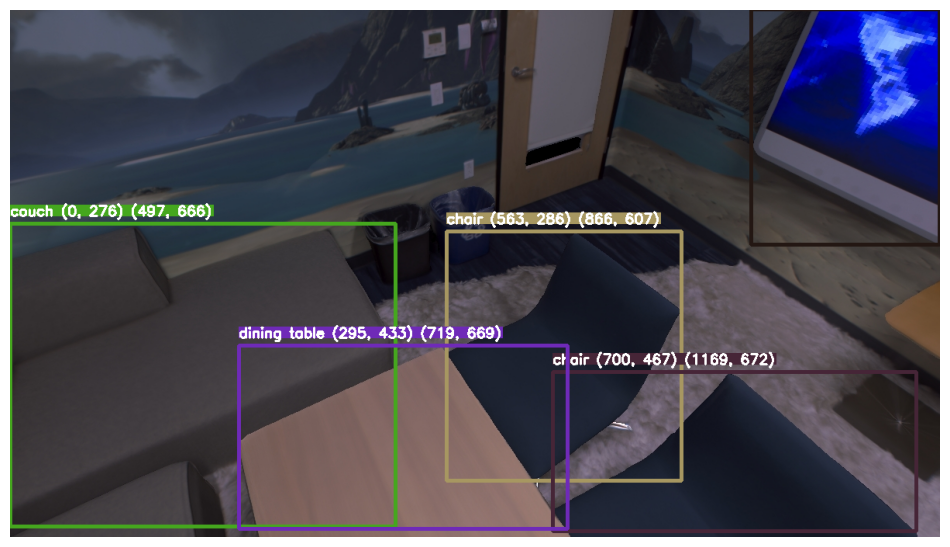

In [50]:
import cv2
import matplotlib.pyplot as plt
import random

# # Sample bounding boxes
# bboxes = [
#     {'x1': 563.787, 'y1': 286.062, 'x2': 866.942, 'y2': 607.664, 'class_id': 56, 'class_name': 'chair'},
#     {'x1': 700.994, 'y1': 467.174, 'x2': 1169.124, 'y2': 672.070, 'class_id': 56, 'class_name': 'chair'},
#     {'x1': 0.785, 'y1': 276.615, 'x2': 497.386, 'y2': 666.890, 'class_id': 57, 'class_name': 'couch'},
#     {'x1': 956.682, 'y1': 0.066, 'x2': 1199.358, 'y2': 303.648, 'class_id': 62, 'class_name': 'tv'},
#     {'x1': 295.778, 'y1': 433.035, 'x2': 719.812, 'y2': 669.801, 'class_id': 60, 'class_name': 'dining table'}
# ]

# Load the image
# image_path = "/home/siddharth/siddharth/thesis/RTG-SLAM/data/Replica/office0/results/frame000394.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# Generate random colors for each bounding box
colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(bboxes))]

# Draw bounding boxes and text
for i, bbox in enumerate(bboxes):
    x1, y1, x2, y2 = int(bbox['x1']), int(bbox['y1']), int(bbox['x2']), int(bbox['y2'])
    class_name = bbox['class_name']
    color = tuple(map(int, colors[i]))  # Convert color to tuple

    # Draw rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)

    # Prepare text: class name + coordinates
    text = f"{class_name} ({x1}, {y1}) ({x2}, {y2})"
    
    # Get text size
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.6
    thickness = 2
    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]

    # Draw filled rectangle as background for text
    text_x, text_y = x1, y1 - 10
    cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), color, -1)

    # Put text on the image (in white for visibility)
    cv2.putText(image, text, (text_x, text_y), font, font_scale, (255, 255, 255), thickness)

# Show the image with bounding boxes and coordinates
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis("off")
plt.show()



#### SAM

In [31]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from segment_anything import sam_model_registry, SamPredictor
from torchvision import transforms

[[563 286 866 607]]
(1, 680, 1200)


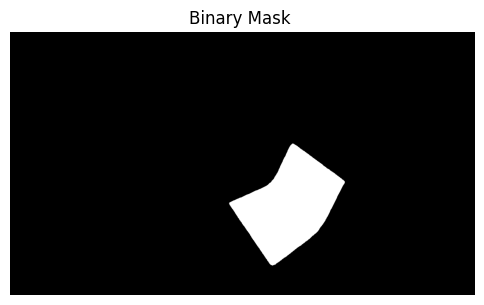

Saved segmented object: segmented_object_0.png


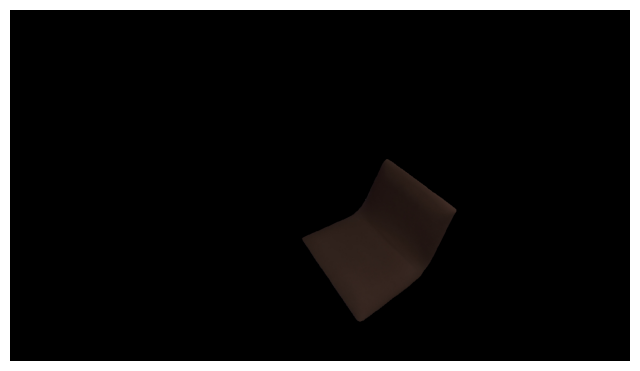

[[ 700  467 1169  672]]
(1, 680, 1200)


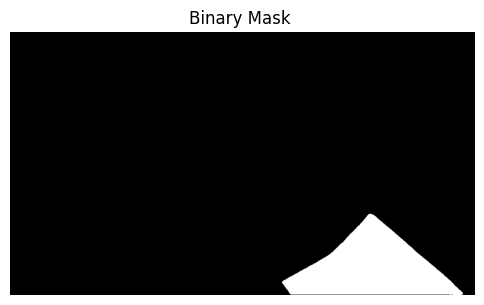

Saved segmented object: segmented_object_1.png


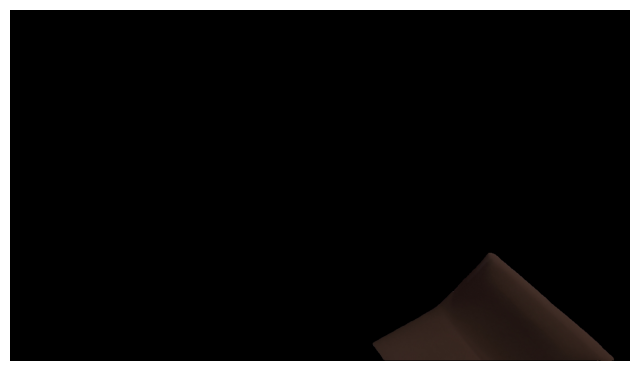

[[  0 276 497 666]]
(1, 680, 1200)


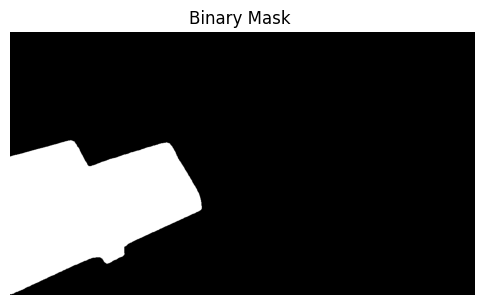

Saved segmented object: segmented_object_2.png


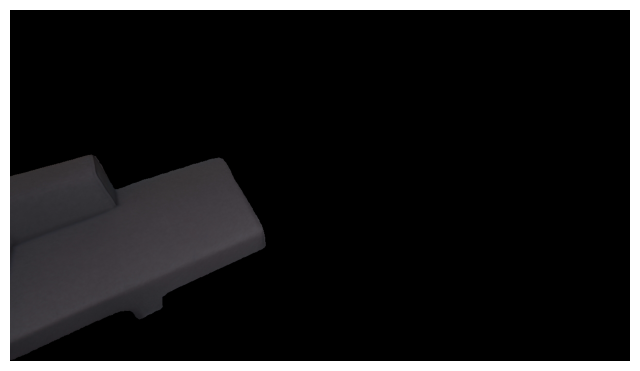

[[ 956    0 1199  303]]
(1, 680, 1200)


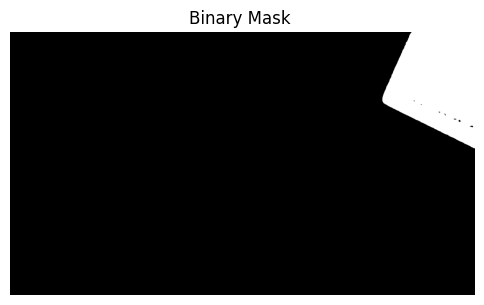

Saved segmented object: segmented_object_3.png


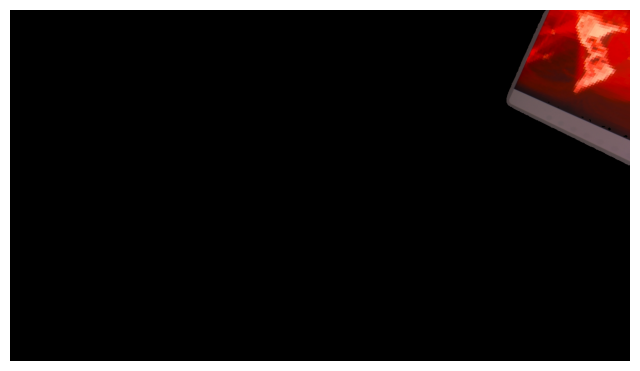

[[295 433 719 669]]
(1, 680, 1200)


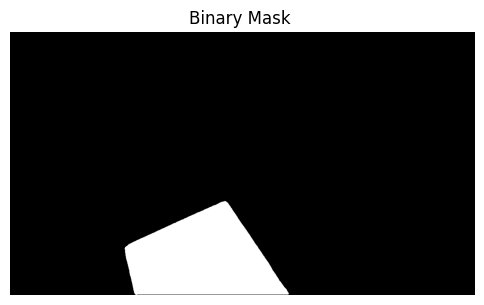

Saved segmented object: segmented_object_4.png


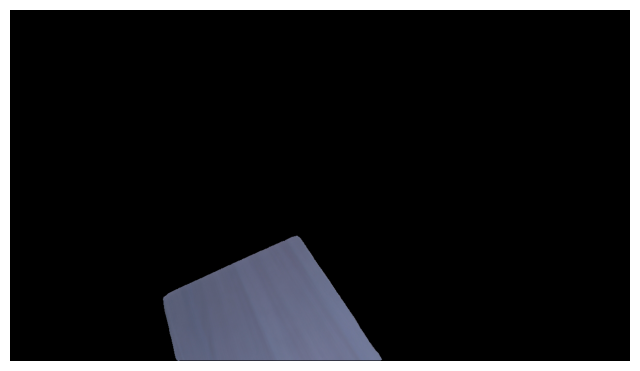

In [208]:
# Load image
image_rgb = cv2.imread(image_path)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract bounding boxes (convert x1, y1, x2, y2 → x, y, w, h for SAM)
bboxes = []
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Convert to integers
    # w, h = x2 - x1, y2 - y1
    bboxes.append([x1, y1, x2, y2])  # Convert for SAM

# Load SAM model
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Path to SAM checkpoint
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)
predictor.set_image(image_rgb)

# Perform segmentation for each bounding box
for i, bbox in enumerate(bboxes):
    bbox_np = np.array([bbox])  # Convert to numpy format
    print(bbox_np)
    # Get mask
    masks, _, _ = predictor.predict(box=bbox_np, multimask_output=False)
    print(masks.shape)
    if masks is None:
        print(f"Skipping bbox {i} (no mask found)")
        continue

    plt.figure(figsize=(6, 6))
    plt.imshow(masks[0], cmap="gray")  # Display binary mask in black & white
    plt.axis("off")
    plt.title(f"Binary Mask ")
    plt.show()

    # Apply segmentation mask
    mask = masks[0]  # Use first mask
    segmented_object = image_rgb.copy()
    segmented_object[~mask] = 0  # Keep only the segmented object

    # Save & visualize results
    output_path = f"segmented_object_{i}.png"
    cv2.imwrite(output_path, cv2.cvtColor(segmented_object, cv2.COLOR_RGB2BGR))
    print(f"Saved segmented object: {output_path}")

    # Plot
    plt.figure(figsize=(8, 6))
    plt.imshow(segmented_object)
    plt.axis("off")
    plt.show()

In [81]:
# Load the SAM model
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Path to SAM checkpoint
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the SAM model
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint).to(device)
predictor = SamPredictor(sam)

# Load image using OpenCV
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Set the image for SAM predictor
predictor.set_image(image_rgb)


all_masks = []

# Process each bounding box
for bbox in bboxes:
    x1, y1, x2, y2 = bbox["x1"], bbox["y1"], bbox["x2"], bbox["y2"]

    # Convert bounding box to SAM format (x, y, w, h)
    bbox_sam = np.array([[x1, y1, x2, y2]])

    # Perform segmentation
    masks, _, _ = predictor.predict(box=bbox_sam, multimask_output=False)

    all_masks.append(masks)
    # # Apply mask to original image
    # mask = masks[0]  # Take the first mask
    # segmented_object = image_rgb.copy()
    # segmented_object[~mask] = 0  # Keep only the segmented object

    # # Save or display the segmented object
    # cv2.imwrite(f"segmented_{bbox['class_name']}.png", cv2.cvtColor(segmented_object, cv2.COLOR_RGB2BGR))
    # print(f"Saved segmented object: {bbox['class_name']}")


### Clip classes

In [64]:
pip install transformers

/bin/bash: /home/siddharth/anaconda3/envs/rtgslam/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached tokenizers-0.21.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached safetensors-0.5.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 9.4 MB/s eta 0:00:00 0:00:01m
Using cached safetensors-0.5.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (461 kB)
Using cached tokenizers-0.21.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import clip
import numpy as np
from transformers import CLIPProcessor, CLIPModel

/home/siddharth/anaconda3/envs/yolo12/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Load the pretrained CLIP model and processor
device = "cuda"
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

class_names_list = list(class_names.values())


# Compute CLIP embeddings for COCO classes
def compute_clip_class_embeddings(classes, clip_model, clip_processor):
    """
    Compute CLIP embeddings for a list of class names.
    """
    inputs = clip_processor(text=classes, return_tensors="pt", padding=True).to("cuda")
    with torch.no_grad():
        text_features = clip_model.get_text_features(**inputs)  # (num_classes, 512)
        text_features = torch.nn.functional.normalize(text_features, dim=-1)
        
    # Store in a dictionary
    class_embeddings = {cls: text_features[i].cpu().numpy() for i, cls in enumerate(classes)}
    return class_embeddings

# Get and save embeddings
clip_class_embeddings = compute_clip_class_embeddings(class_names_list, clip_model, clip_processor)
np.save("clip_coco_embeddings_hf.npy", clip_class_embeddings)

In [16]:
first_class = list(clip_class_embeddings.keys())[80]  # Get first class name
print(f"Class: {first_class}, Embedding Shape: {clip_class_embeddings[first_class].shape}")

Class: others, Embedding Shape: (512,)


In [26]:
embeddings = np.load("clip_coco_embeddings_hf.npy", allow_pickle=True).item()
print(embeddings["others"])

[ 1.92894600e-02  1.09629016e-02 -1.89400499e-03  1.14133591e-02
 -4.92062827e-04 -6.50338479e-04 -1.97284222e-02 -1.33063883e-01
  2.09027063e-02  2.28209067e-02 -3.31962551e-03 -4.56267549e-03
 -2.97268834e-02 -3.17179994e-03  1.99196264e-02  1.18562579e-02
  6.72258716e-03 -1.26113556e-02  8.09146091e-03  1.25190048e-02
  3.51575576e-02  9.84243397e-03  4.63223550e-03 -6.29417459e-03
 -9.03465413e-03 -1.12358415e-02 -2.82921568e-02 -1.24801043e-02
 -3.12248170e-02  1.46800280e-02  3.04897106e-03 -1.92146171e-02
  1.57738407e-03  2.74863895e-02 -1.86664239e-02  5.82515588e-03
  2.47369222e-02  6.55785576e-03 -1.02699958e-02 -2.62345485e-02
 -3.74726253e-03 -1.92303248e-02 -4.85264370e-03 -1.46684691e-03
 -4.60951123e-03  2.00752076e-02  8.92928708e-03  1.86286110e-03
  1.52502032e-02  1.93601027e-02  1.42303680e-03 -1.43551333e-02
  1.04160327e-02 -1.70203745e-02 -1.87486969e-02  5.68753155e-03
 -7.57549983e-03  7.08970538e-06 -2.29149796e-02 -1.24123339e-02
  1.58383194e-02 -2.77311

In [24]:

print(clip_class_embeddings["others"])

[ 1.92894600e-02  1.09629016e-02 -1.89400499e-03  1.14133591e-02
 -4.92062827e-04 -6.50338479e-04 -1.97284222e-02 -1.33063883e-01
  2.09027063e-02  2.28209067e-02 -3.31962551e-03 -4.56267549e-03
 -2.97268834e-02 -3.17179994e-03  1.99196264e-02  1.18562579e-02
  6.72258716e-03 -1.26113556e-02  8.09146091e-03  1.25190048e-02
  3.51575576e-02  9.84243397e-03  4.63223550e-03 -6.29417459e-03
 -9.03465413e-03 -1.12358415e-02 -2.82921568e-02 -1.24801043e-02
 -3.12248170e-02  1.46800280e-02  3.04897106e-03 -1.92146171e-02
  1.57738407e-03  2.74863895e-02 -1.86664239e-02  5.82515588e-03
  2.47369222e-02  6.55785576e-03 -1.02699958e-02 -2.62345485e-02
 -3.74726253e-03 -1.92303248e-02 -4.85264370e-03 -1.46684691e-03
 -4.60951123e-03  2.00752076e-02  8.92928708e-03  1.86286110e-03
  1.52502032e-02  1.93601027e-02  1.42303680e-03 -1.43551333e-02
  1.04160327e-02 -1.70203745e-02 -1.87486969e-02  5.68753155e-03
 -7.57549983e-03  7.08970538e-06 -2.29149796e-02 -1.24123339e-02
  1.58383194e-02 -2.77311

In [176]:
all_masks =np.array(all_masks)

In [177]:
all_masks.shape

(5, 1, 680, 1200)

In [178]:
bboxes[0]["class_id"]

56

In [179]:
clip_class_embeddings["chair"]

array([     -0.223,  -0.0072916,    -0.19199,    -0.26908,   -0.033186,    0.056166,   -0.077175,    -0.91266,   -0.073922,     0.58938,    0.012819,    -0.11586,     0.24328,    -0.10192,    -0.06537,    0.049512,     0.16202,   -0.022889,    -0.37041,   -0.090878,      0.3137,     -0.1289,   -0.029991,   -0.080772,
           -0.1274,     0.18233,     0.21491,     0.25647,     -0.6031,    0.071975,    -0.43023,     0.16678,  0.00043925,    0.068979,    -0.38935,    -0.22133,    -0.17193,    -0.10023,     0.34685,   -0.027184,     0.27188,    0.078883,   0.0048721,   -0.023612,     0.15365,     0.17434,   -0.034349,     0.16905,
         -0.012787,     0.29266,   -0.058036,    0.059681,     0.17496,    -0.76937,    -0.40831,   -0.013568,    0.040244,     0.16863,    -0.16845,     0.38952,     0.16767,   -0.086504,    0.041975,    -0.33719,     -0.5148,    0.089069,    0.047979,    0.026449,     0.06404,    -0.30939,    -0.47026,    -0.10432,
           0.22612,    0.021759,    0.01518

In [180]:
clip_class_embeddings[class_names_list[56]]

array([     -0.223,  -0.0072916,    -0.19199,    -0.26908,   -0.033186,    0.056166,   -0.077175,    -0.91266,   -0.073922,     0.58938,    0.012819,    -0.11586,     0.24328,    -0.10192,    -0.06537,    0.049512,     0.16202,   -0.022889,    -0.37041,   -0.090878,      0.3137,     -0.1289,   -0.029991,   -0.080772,
           -0.1274,     0.18233,     0.21491,     0.25647,     -0.6031,    0.071975,    -0.43023,     0.16678,  0.00043925,    0.068979,    -0.38935,    -0.22133,    -0.17193,    -0.10023,     0.34685,   -0.027184,     0.27188,    0.078883,   0.0048721,   -0.023612,     0.15365,     0.17434,   -0.034349,     0.16905,
         -0.012787,     0.29266,   -0.058036,    0.059681,     0.17496,    -0.76937,    -0.40831,   -0.013568,    0.040244,     0.16863,    -0.16845,     0.38952,     0.16767,   -0.086504,    0.041975,    -0.33719,     -0.5148,    0.089069,    0.047979,    0.026449,     0.06404,    -0.30939,    -0.47026,    -0.10432,
           0.22612,    0.021759,    0.01518

In [181]:
def show_binary_mask(masks, index=0):
    if len(masks) == 0:
        print("No masks found.")
        return
    
    mask = masks  # Remove extra dimensions if needed
    
    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap="gray")  # Display binary mask in black & white
    plt.axis("off")
    plt.title(f"Binary Mask {index}")
    plt.show()
    
def generate_clip_feature_map(image, masks, bboxes, class_embeddings):
    image_np = np.array(image)
    H, W, _ = image_np.shape
    print(H,W)
    # Initialize feature map (H, W, 512) with zeros
    feature_map = np.zeros((H, W, 512), dtype=np.float32)

    # Assign CLIP vectors to segmented regions
    for i, mask in enumerate(masks):
        # mask = mask.squeeze()  # Convert to 2D binary mask
        # print(mask)
        # return
        show_binary_mask(mask, index=0) 
        # print(i)
        class_idx = bboxes[i]["class_id"]
    
        print(class_idx)
        if class_idx >= len(class_names_list) or class_names_list[class_idx] == "N/A":
            continue  # Skip invalid classes
        print(class_names_list[class_idx])
        class_vector = class_embeddings[class_names_list[class_idx]]  # Lookup precomputed vector
        # print("shape class vector",class_vector.shape)
        # print(class_vector)
        feature_map[mask>0] = class_vector  # Assign to segmented region

    return feature_map

In [107]:
clip_class_embeddings = np.load("clip_coco_embeddings_hf.npy", allow_pickle=True).item()


680 1200


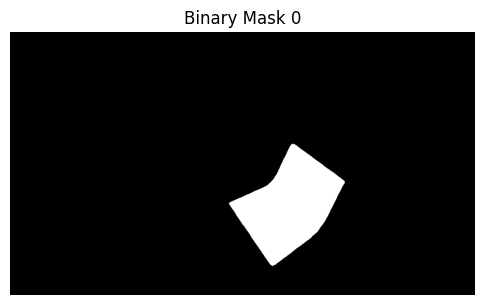

56
chair


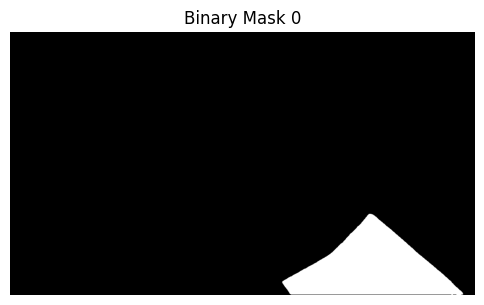

56
chair


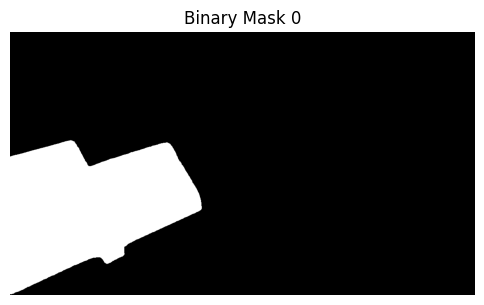

57
couch


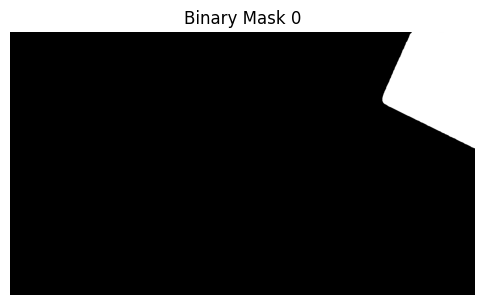

62
tv


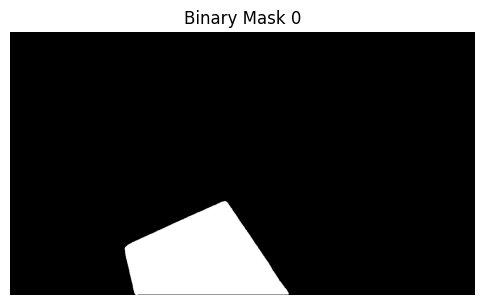

60
dining table


In [182]:

# Assume `masks` is from SAM and `detected_class_indices` is from object detector
clip_feature_map = generate_clip_feature_map(image, all_masks.squeeze(1), bboxes, clip_class_embeddings)


In [183]:
clip_feature_map.shape

(680, 1200, 512)

In [184]:
clip_feature_map = torch.tensor(clip_feature_map, dtype=torch.float32)

torch.Size([1, 512])


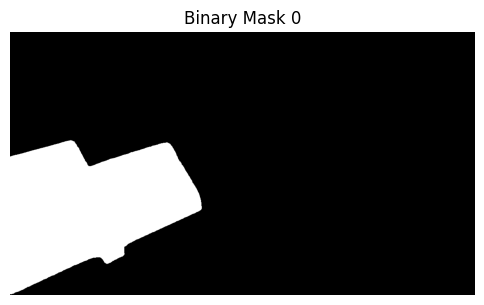

Difference: 0.0
Difference: 5.342221
Cosine Similarity: 0.8616763949394226


/tmp/ipykernel_249691/938027939.py:25: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  print("Difference:", np.linalg.norm(assigned_vector - clip_class_embeddings["couch"]))
/tmp/ipykernel_249691/938027939.py:26: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  print("Difference:", np.linalg.norm(assigned_vector - query_features[0].detach().numpy()))


In [193]:
query_list = ["tv"] 
inputs = clip_processor(text=query_list, return_tensors="pt", padding=True)
query_features = clip_model.get_text_features(**inputs)  # Shape: [num_queries, 512]
# query_features = torch.nn.functional.normalize(query_features, p=2, dim=1)
# query_features = query_features / query_features.norm(dim=-1, keepdim=True)  # Normalize
query_features.to(device)

print(query_features.shape)
def check_clip_mask_correctness():
    mask = all_masks[2].squeeze()
    # mask.shape
    show_binary_mask(mask, index=0) 
    mask_coords = np.argwhere(mask > 0)
    # mask_coords
    y,x = mask_coords[100]
    # Ensure clip_feature_map is a PyTorch tensor
    # clip_feature_map = torch.tensor(clip_feature_map, dtype=torch.float32)
    
    assigned_vector = clip_feature_map[y,x]
    # assigned_vector = assigned_vector / assigned_vector.norm(dim=-1, keepdim=True)

    # assigned_vector
    class_of_the_masked_object = 56
    # print(class_names_list[class_of_the_masked_object])
    print("Difference:", np.linalg.norm(assigned_vector - clip_class_embeddings["couch"]))
    print("Difference:", np.linalg.norm(assigned_vector - query_features[0].detach().numpy()))
    cos_sim = torch.nn.functional.cosine_similarity(assigned_vector, query_features)
    print("Cosine Similarity:", cos_sim.item()) 

check_clip_mask_correctness()

2.384185791015625e-07
Query Features Shape: torch.Size([3, 512])


/tmp/ipykernel_249691/1684201664.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  clip_feature_map = torch.tensor(clip_feature_map, dtype=torch.float32)  # Shape: [h, w, 512]


Clip Feature Map Shape: torch.Size([816000, 512])
Similarity Score Shape: torch.Size([816000, 3])
Found the queried object in the scene
0.5359311103820801


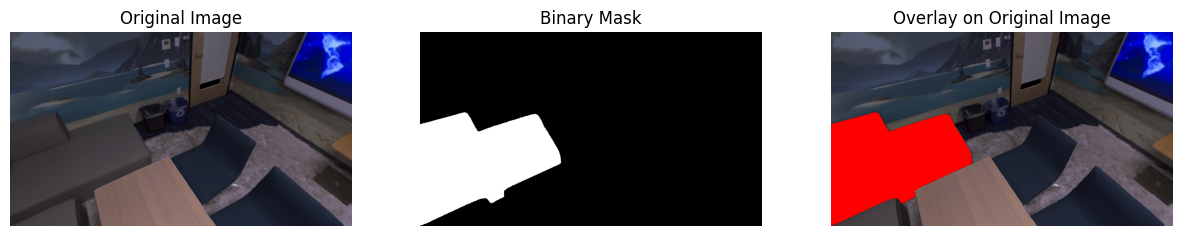

In [197]:
import torch
import numpy as np
import os
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
import time

# Load the pretrained CLIP model and processor
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load the saved feature map from .pt file
def load_clip_feature_map(feature_path):
    if not os.path.exists(feature_path):
        raise FileNotFoundError(f"Feature map not found at {feature_path}")
    
    clip_feature_map = torch.tensor(np.load(feature_path, allow_pickle=True), dtype=torch.float32)
    print(f"Loaded feature map from {feature_path}, shape: {clip_feature_map.shape}")
    return clip_feature_map

def infer_object_and_segment(clip_feature_map, query_list,im):
    # Load the CLIP feature map
    tt = time.time()
    # clip_feature_map = load_clip_feature_map(feature_path)
    print(time.time()-tt)
    tt1 = time.time()
    # print("clip_feature_map", clip_feature_map.shape)
    # Encode the queries using CLIP (text)
    inputs = clip_processor(text=query_list, return_tensors="pt", padding=True)
    query_features = clip_model.get_text_features(**inputs)  # Shape: [num_queries, 512]
    
    # Normalize the text features
    query_features = torch.nn.functional.normalize(query_features, p=2, dim=1)
    
    print("Query Features Shape:", query_features.shape)
    
    # Ensure clip_feature_map is a PyTorch tensor
    clip_feature_map = torch.tensor(clip_feature_map, dtype=torch.float32)  # Shape: [h, w, 512]
    
    # Reshape clip_feature_map (h, w, 512) to (num_pixels, 512)
    h, w, _ = clip_feature_map.shape
    clip_feature_map_reshaped = clip_feature_map.reshape(-1, 512)  # Shape: [num_pixels, 512]
    
    print("Clip Feature Map Shape:", clip_feature_map_reshaped.shape)
    
    # Compute cosine similarity between each query and every pixel in the image feature map
    similarity_score = clip_feature_map_reshaped @ (query_features.T)  # Shape: [num_pixels, num_queries]
    print("Similarity Score Shape:", similarity_score.shape)

    # Create a binary mask where the highest similarity corresponds to the first query
    mask_3d = similarity_score[:, 0] > similarity_score[:, 1:].max(dim=1)[0]
    
    # print("Mask unique values:", torch.unique(mask_3d))
    
    if mask_3d.any():
        print("Found the queried object in the scene")
    else:
        print("No such object found in the scene")
        return None, None

    # Reshape mask to match feature map size (h, w)
    best_query_mask = mask_3d.reshape(h, w)
    
    # Convert the tensor to a NumPy array for visualization
    binary_mask = best_query_mask.cpu().numpy().astype(np.uint8)
    
    # Create a blank white background
    # blank_image = np.ones((h, w, 3), dtype=np.uint8) * 255
    
    # Color segmented object in red
    overlay = np.array(im).copy()
    overlay[binary_mask == 1] = np.array([255, 0, 0])  # Red mask
    print(time.time()-tt1)
    
    # Plot results
    plt.figure(figsize=(15, 5))
    
     
    # Plot original image
    plt.subplot(1, 3, 1)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Original Image")

    # Binary Mask
    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap="gray")
    plt.axis("off")
    plt.title("Binary Mask")
    
    # Overlay Image
    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.axis("off")
    plt.title("Overlay on Original Image")
    
    plt.show()

    return binary_mask, overlay

# # **Run Inference**
# feature_path = "/home/siddharth/siddharth/thesis/my_seg_yolo/clip_coco_embeddings_hf.npy"
query_list = ["couch", "tv", "chair"]  # Example object queries
# image_path = "/home/open/SKV_Mid_Rv/3dgs-gradient-backprojection/data/IDR_out_obj_track/images/0012.jpg"

image = Image.open(image_path)

binary_mask, overlay_mask = infer_object_and_segment(clip_feature_map, query_list, image)

In [12]:
import os
from ultralytics import YOLO

# Initialize the model
# model = YOLO('yolov12x.pt')  # Adjust the path if necessary

# Define the input directory where your images are located
input_directory = '/home/siddharth/siddharth/thesis/RTG-SLAM/data/Replica/office0/results/'

# Define the output directory where you want to save the results
output_directory = '/home/siddharth/siddharth/thesis/my_seg_yolo/output/'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Batch size
batch_size = 128  # You can adjust this based on your available GPU memory

# Loop through the images in batches
for i in range(0, 2000, batch_size):  # frame0000001 to frame001999
    # Prepare the list of image filenames in the current batch
    batch_filenames = [f"frame{i + j:06d}.jpg" for j in range(batch_size) if os.path.exists(os.path.join(input_directory, f"frame{i + j:06d}.jpg"))]
    
    # Check if there are any valid images in the batch
    if len(batch_filenames) > 0:
        # Construct the full paths for the images in the batch
        batch_image_paths = [os.path.join(input_directory, filename) for filename in batch_filenames]
        
        # Process the batch of images with YOLO model
        results = model(batch_image_paths)

        # Process each result in the results list
        for idx, result in enumerate(results):
            # Get the corresponding image filename
            image_filename = batch_filenames[idx]
            
            # Save the result (image with bounding boxes) directly using the save() method
            result.save(filename=f"{output_directory}/{image_filename}")
            
        # Optionally, print progress
        print(f"Processed and saved batch {i // batch_size + 1}")
    else:
        print(f"No valid images found in batch starting at frame {i:06d}, skipping.")


0: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
1: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
2: 384x640 2 chairs, 1 couch, 1 tv, 7.2ms
3: 384x640 2 chairs, 1 couch, 1 tv, 7.2ms
4: 384x640 2 chairs, 1 couch, 1 tv, 7.2ms
5: 384x640 2 chairs, 1 couch, 1 tv, 7.2ms
6: 384x640 2 chairs, 1 couch, 1 tv, 7.2ms
7: 384x640 2 chairs, 1 couch, 1 tv, 7.2ms
8: 384x640 2 chairs, 1 couch, 1 tv, 7.2ms
9: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
10: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
11: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
12: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
13: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
14: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
15: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
16: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
17: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
18: 384x640 2 chairs, 1 couch, 1 dining table, 1 tv, 7.2ms
